# Pretrained Model

- 다른 목적을 위해 미리 학습된 모델.
- Pretrained model을 현재 해결하려는 문제에 이용한다.
- 대부분 내가 만들려는 네트워크 모델에 pretrained model을 포함시켜 사용한다.
    - 이런 방식을 Transfer Learning (전이 학습)이라고 한다.
    - 보통 Feature Extractor block을 재사용한다.

## Pytorch에서 제공하는 Pretrained Model 
- 분야별 라이브러리에서 제공
    - torchvision: https://pytorch.org/vision/stable/models.html
- torch hub 를 이용해 모델과 학습된 parameter를 사용할 수 있다.
    - https://pytorch.org/hub/
- 이외에도 많은 모델과 학습된 paramter가 인터넷상에 공개되 있다.    
    - 딥러닝 모델기반 application을 개발 할 때는 대부분 Transfer Learning을 한다.  
    - 다양한 분야에서 연구된 많은 딥러닝 모델들이 구현되어 공개 되어 있으며 학습된 Parameter들도 제공되고 있다.  
    - [paperswithcode](https://paperswithcode.com/)에서 State Of The Art(SOTA) 논문들과 그 구현된 모델을 확인할 수 있다. 
    
>  **State Of The Art(SOTA)**: 특정 시점에 특정 분야에서 가장 성능이 좋은 모델을 말한다.

## VGGNet Pretrained 모델을 이용해 이미지 분류

- Pytorch가 제공하는 VGG 모델은 ImageNet dataset으로 학습시킨 weight를 제공한다.
    - 120만장의 transet, 1000개의 class로 구성된 데이터셋.
    - Output으로 1000개의 카테고리에 대한 확률을 출력한다. 

In [1]:
# ImageNet 1000개의 class 목록
# !pip install wget
import wget
url = 'https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt'
imagenet_filepath = wget.download(url) # 다운로드 받고 받은 경로를 반환.

100% [..............................................................................] 30564 / 30564

In [2]:
imagenet_filepath  # 다운 받은 파일의 경로

'imagenet1000_clsidx_to_labels (3).txt'

In [3]:
# eval("파이썬코드")  # 파이썬 코드를 문자열로 넣으면 알아서 해석해서 실행
r = eval("1 + 3")
print(type(r))
r

<class 'int'>


4

In [4]:
r = eval("[1, 2, 3]")
print(r, type(r))

[1, 2, 3] <class 'list'>


In [5]:
r = eval("{0:'사람', 1:'물통'}")
print(type(r), r)

<class 'dict'> {0: '사람', 1: '물통'}


In [6]:
# with open(imagenet_filepath, "rt") as fr:
#     a = fr.read()
#     print(type(a))
#     print(a)

In [7]:
with open(imagenet_filepath, "rt") as fr:
    index_to_class = eval(fr.read())
    
print(type(index_to_class))

<class 'dict'>


In [8]:
index_to_class[100]

'black swan, Cygnus atratus'

In [9]:
# 추론할 이미지 다운로드
import requests
from io import BytesIO
from PIL import Image



In [10]:
## import

import torch
from torchvision import models, transforms
from torchinfo import summary

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [31]:
## torchvision에서 제공하는 Pretrained 모델을 다운로드
### VGG19 모델.
### weights: 학습된 파라미터들을 같이 다운로드 받는다. => Image Net 데이터셋으로 학습한 파라미터를 받는다.
##### IMAGENET1K_V1 : Image net 버전 1로 학습된 파라미터
##### IMAGENET1K_V2 : 버전 2로 학습된 파라미터
####### 모델에 따라서 V2는 없을 수도 있다.
######   models.VGG19_Weights.DEFAULT - 둘중에 기본 데이터셋으로 설정된 것을 받는다.
load_model_vgg = models.vgg19(weights=models.VGG19_Weights.IMAGENET1K_V1)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to C:\Users\Playdata/.cache\torch\hub\checkpoints\vgg19-dcbb9e9d.pth
100%|███████████████████████████████████████████████████████████████| 548M/548M [00:39<00:00, 14.6MB/s]


In [32]:
load_model_alex = models.alexnet(weights=models.AlexNet_Weights.DEFAULT)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to C:\Users\Playdata/.cache\torch\hub\checkpoints\alexnet-owt-7be5be79.pth
100%|███████████████████████████████████████████████████████████████| 233M/233M [00:02<00:00, 87.5MB/s]


In [34]:
summary(load_model_vgg, (100, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      [100, 1000]               --
├─Sequential: 1-1                        [100, 512, 7, 7]          --
│    └─Conv2d: 2-1                       [100, 64, 224, 224]       1,792
│    └─ReLU: 2-2                         [100, 64, 224, 224]       --
│    └─Conv2d: 2-3                       [100, 64, 224, 224]       36,928
│    └─ReLU: 2-4                         [100, 64, 224, 224]       --
│    └─MaxPool2d: 2-5                    [100, 64, 112, 112]       --
│    └─Conv2d: 2-6                       [100, 128, 112, 112]      73,856
│    └─ReLU: 2-7                         [100, 128, 112, 112]      --
│    └─Conv2d: 2-8                       [100, 128, 112, 112]      147,584
│    └─ReLU: 2-9                         [100, 128, 112, 112]      --
│    └─MaxPool2d: 2-10                   [100, 128, 56, 56]        --
│    └─Conv2d: 2-11                      [100, 256, 56, 56]        29

In [36]:
summary(load_model_alex, (1, 3, 224, 224))

Layer (type:depth-idx)                   Output Shape              Param #
AlexNet                                  [1, 1000]                 --
├─Sequential: 1-1                        [1, 256, 6, 6]            --
│    └─Conv2d: 2-1                       [1, 64, 55, 55]           23,296
│    └─ReLU: 2-2                         [1, 64, 55, 55]           --
│    └─MaxPool2d: 2-3                    [1, 64, 27, 27]           --
│    └─Conv2d: 2-4                       [1, 192, 27, 27]          307,392
│    └─ReLU: 2-5                         [1, 192, 27, 27]          --
│    └─MaxPool2d: 2-6                    [1, 192, 13, 13]          --
│    └─Conv2d: 2-7                       [1, 384, 13, 13]          663,936
│    └─ReLU: 2-8                         [1, 384, 13, 13]          --
│    └─Conv2d: 2-9                       [1, 256, 13, 13]          884,992
│    └─ReLU: 2-10                        [1, 256, 13, 13]          --
│    └─Conv2d: 2-11                      [1, 256, 13, 13]         

In [37]:
model = load_model_alex.to(device)
i = torch.randn(1, 3, 224, 224).to(device)
p = model(i)
p.shape

torch.Size([1, 1000])

In [41]:
label = p[0].argmax(dim=-1).item()
index_to_class[label]

'poncho'

In [46]:
torch.nn.Softmax(dim=-1)(p[0]).max(dim=-1).values

tensor(0.3132, grad_fn=<MaxBackward0>)

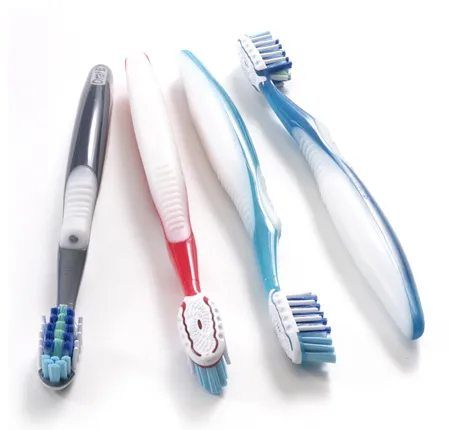

In [105]:
img_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/25/Common_goldfish.JPG/800px-Common_goldfish.JPG'
img_url = 'https://cdn.download.ams.birds.cornell.edu/api/v1/asset/169231441/1800'
img_url = 'https://blogs.ifas.ufl.edu/news/files/2021/10/anole-FB.jpg'
img_url = 'https://i.namu.wiki/i/uk5VsDTA_sXLvqe0Rwj8E678mIj4SkhbUqRyS27TEvVsFVliMwtuO6BpLe9N65IYG5c2XgWndG13sQiReZoz1A.webp'

res = requests.get(img_url)  # url로 요청-> 응답 받기.
test_img = Image.open(BytesIO(res.content)) 
# 응답받은 것이 binary 파일일 경우. BytesIO(binary) => bytes타입 입출력이 가능한 객체.
test_img

In [106]:
# 전처리 
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()  
    # PIL.Image -> torch.Tensor, 0 ~ 1 scaling, channel first처리
])

In [107]:
input_data = test_transform(test_img)
print(type(input_data), input_data.shape, input_data.min(), input_data.max())

<class 'torch.Tensor'> torch.Size([3, 224, 224]) tensor(0.0235) tensor(1.)


In [108]:
# batch 축을 추가.
input_data = input_data.unsqueeze(dim=0)
input_data.shape

torch.Size([1, 3, 224, 224])

In [109]:
# 모델을 device로 이동
model = load_model_vgg.to(device)

In [110]:
# 추론
pred1 = model(input_data.to(device))

In [111]:
# 추론결과를 확률로 변환
pred_prob1 = torch.nn.Softmax(dim=-1)(pred1)
# 추론 label, 확률값을 조회
label1 = pred_prob1.max(dim=-1).indices
prob1 = pred_prob1.max(dim=-1).values
# 추론 label을 이용해서 label name을 조회
labelname1 = index_to_class[label1.item()]

In [112]:
print(label1.item(), labelname1)
print("확률:", prob1.item())

473 can opener, tin opener
확률: 0.48735854029655457


# Transfer learning (전이학습)
- 사전에 학습된 신경망의 구조와 파라미터를 재사용해서 새로운 모델(우리가 만드는 모델)의 시작점으로 삼고 해결하려는 문제를 위해 다시 학습시킨다.
- 전이 학습을 통해 다음을 해결할 수 있다.
    1. 데이터 부족문제
        - 딥러닝은 대용량의 학습데이터가 필요하다.
        - 충분한 데이터를 수집하는 것은 항상 어렵다.
    2. 과다한 계산량
        - 신경망 학습에는 엄청난 양의 계산 자원이 필요하다.

![transfer_learning01](figures/09_transfer_01.png)

- 미리 학습된(pre-trained) Model을 이용하여 모델을 구성한 뒤 현재 하려는 예측 문제를 해결한다.
- 보통 Pretrained Model에서 Feature Extraction 부분을 사용한다.
    - Computer Vision 문제의 경우 Bottom 쪽의 Convolution Layer(Feature Extractor)들은 이미지에 나타나는 일반적인 특성을 추출하므로 **다른 대상을 가지고 학습했다고 하더라도 재사용할 수 있다.**
    - Top 부분 Layer 부분은 특히 출력 Layer의 경우 대상 데이터셋의 목적에 맞게 변경 해야 하므로 재사용할 수 없다.

![transfer_learning02](figures/09_transfer_02.png)

> **Frozon**: Training시 parameter가 update 되지 않도록 하는 것을 말한다.

### Feature extraction 재사용
- Pretrained Model에서 Feature Extractor 만 가져오고 추론기(Fully connected layer)만 새로 정의한 뒤 그 둘을 합쳐서 모델을 만든다.
- 학습시 직접 구성한 추론기만 학습되도록 한다.
    - Feature Extractor는 추론을 위한 Feature 추출을 하는 역할만 하고 그 parameter(weight)가 학습되지 않도록 한다.
- 모델/레이어의 parameter trainable 여부 속성 변경
    - model/layer 의 `parameters()` 메소드를 이용해 weight와 bias를 조회한 뒤 `requires_grad` 속성을 `False`로 변경한다.
        
#### Backbone, Base network
전체 네트워크에서 Feature Extraction의 역할을 담당하는 부분을 backbone/base network라고 한다.

## Fine-tuning(미세조정)
- Transfer Learning을 위한 Pretrained 모델을 내가 학습시켜야 하는 데이터셋(Custom Dataset)으로 **재학습**시키는 것을 fine tunning 이라고 한다.
- 주어진 문제에 더 적합하도록 Feature Extractor의 가중치들도 조정 한다.

### Fine tuning 전략
![transfer02](figures/09_transfer_03.png)

- **세 전략 모두 추론기는 trainable로 한다.**

**<font size='5'>1. 전체 모델을 전부 학습시킨다.(1번)</font>**    
- Pretrained 모델의 weight는 Feature extraction 의 초기 weight 역할을 한다.
- **Train dataset의 양이 많고** Pretrained 모델이 학습했던 dataset과 Custom dataset의 class간의 유사성이 **낮은 경우** 적용.
- 학습에 시간이 많이 걸린다.
    
    
**<font size='5'>2. Pretrained 모델 Bottom layer들(Input과 가까운 Layer들)은 고정시키고 Top layer의 일부를 재학습시킨다.(2번)</font>**     
- **Train dataset의 양이 많고** Pretrained 모델이 학습했던 dataset과 Custom dataset의 class간의 유사성이 **높은 경우** 적용.
- **Train dataset의 양이 적고** Pretained 모델이 학습했던 dataset과 custom dataset의 class간의 유사성이 **낮은 경우** 적용
    
    
**<font size='5'>3. Pretrained 모델 전체를 고정시키고 classifier layer들만 학습시킨다.(3번)</font>**      
- **Train dataset의 양이 적고** Pretrained 모델이 학습했던 dataset과 Custom dataset의 class간의 유사성이 **높은 경우** 적용.
  
  
> **Custom dataset:** 내가 학습시키고자 하는 dataset 
> 1번 2번 전략을 Fine tuning 이라고 한다.

![fine tuning](figures/09_finetuning.png)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, datasets, transforms
from torchinfo import summary

from module.train import fit
from module.utils import plot_fit_result

import os
from zipfile import ZipFile
!pip install gdown -U
import gdown

device = 'cuda' if torch.cuda.is_available() else "cpu"
device

In [ ]:
# download
url = 'https://drive.google.com/uc?id=1YIxDL0XJhhAMdScdRUfDgccAqyCw5-ZV'
path = r'data/cats_and_dogs_small.zip'
gdown.download(url, path, quiet=False)